In [2]:
import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
# from skimage.color import grey2rgb

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
model = tensorflow.keras.models.load_model('best_weights.hdf5')

In [4]:
import requests

In [5]:
def classify_image(img):
    img = img_to_array(img)
    labels = {0: 'MildDemented', 1: 'ModerateDemented', 2: 'NonDemented', 3: 'VeryMildDemented'}
    img = img/255
    imshow(img)
    plt.axis('off')

    img = np.expand_dims(img,axis=0)
    predict_x=model.predict(img) 
    print(predict_x)
    np.vectorize(predict_x)
    answer=np.argmax(predict_x,axis=1)
    print(answer)
    probability = round(np.max(model.predict(img)*100),2)

    return str(probability)+' % chances are there that the image is '+str(labels[answer[0]])


1/1 [==============================] - 5s 5s/step
[[6.2345304e-03 9.9319768e-01 1.1125353e-04 4.5653465e-04]]
[1]
1/1 [==============================] - 0s 34ms/step
99.32 % chances are there that the image is ModerateDemented


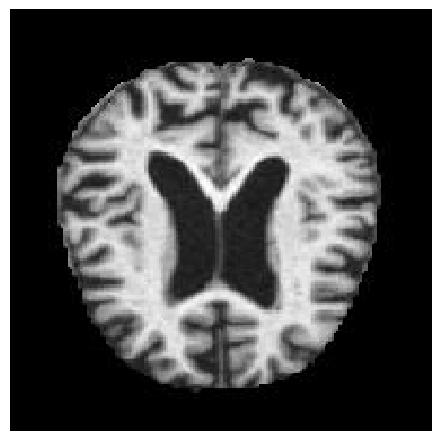

In [6]:
img = load_img(r'C:\Users\LAPTOP HOUSE\Desktop\6th sem\ML\project\try4\Alzheimer-s-Classification-using-DenseNet169-main\dataoriginal\test\ModerateDemented\27 (2).jpg', target_size = (224,224,3))
print(classify_image(img))

In [7]:
gr.Interface(fn=classify_image,title="Alzheimer's Disease Prediction",
             inputs=gr.Image(shape=(224, 224)),examples=["images.png", "image2.jpg","nonDem32.jpg","verymild.jpg"],
             outputs="text").launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
